In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
from IPython.display import display
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

car_crashes
diamonds
mpg
penguins
planets
taxis

- mpg(continuous) : mức tiêu thụ nhiên liệu tính bằng dặm(miles) trên gallon
- cylinders: multi-valued discrete
- displacement: continuous
- horsepower: continuous
- weight: continuous
- acceleration: continuous
- model year: multi-valued discrete
- origin: multi-valued discrete
- car name: string (unique for each instance)

# MPG Dataset

In [3]:
mpg = sns.load_dataset('mpg')
display(mpg.head())
print("Shape of data:",mpg.shape)
display(mpg.index)
display(mpg.columns)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Shape of data: (398, 9)


RangeIndex(start=0, stop=398, step=1)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [4]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [5]:
display(mpg.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [6]:
mpg = mpg.dropna()
display(mpg.isnull().sum())
print("Shape of data:",mpg.shape)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Shape of data: (392, 9)


In [7]:
print(f"Min mpg: {mpg.mpg.min()} and Max mpg: {mpg.mpg.max()}")
print(f"Min horsepower: {mpg.horsepower.min()} and Max horsepower: {mpg.horsepower.max()}")

print(f'\nNumber of Unique cylinders : {list(mpg.cylinders.unique())}')
print(f'Number of Unique model_year : {list(mpg.model_year.unique())}')

print(f"\n<<<Count of origin>>> \n{mpg.origin.value_counts()}")


Min mpg: 9.0 and Max mpg: 46.6
Min horsepower: 46.0 and Max horsepower: 230.0

Number of Unique cylinders : [8, 4, 6, 3, 5]
Number of Unique model_year : [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]

<<<Count of origin>>> 
usa       245
japan      79
europe     68
Name: origin, dtype: int64


In [8]:
mpg[['mpg','displacement','horsepower','weight','acceleration']].describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


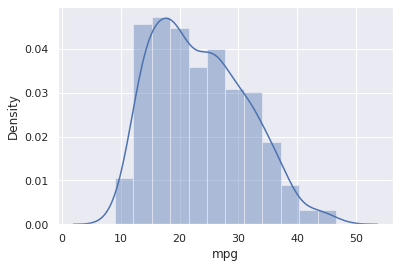

In [9]:
sns.distplot(mpg['mpg'], kde=True);

Mức tiêu thụ nhiên liệu có đồi thị histogram dạng lệch trái, với giá trị mpg càng cap, thì chiếc xe đó càng tiết kiệm nhiên liệu

In [10]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

mpg_scale = mpg.copy()
mpg_scale ['displacement'] = scale(mpg_scale['displacement'])
mpg_scale['horsepower'] = scale(mpg_scale['horsepower'])
mpg_scale ['acceleration'] = scale(mpg_scale['acceleration'])
mpg_scale ['weight'] = scale(mpg_scale['weight'])
mpg_scale['mpg'] = scale(mpg_scale['mpg'])

In [11]:
mpg_scale['Country_code'] = mpg.origin.replace([1,2,3],['USA','Europe','Japan'])
mpg_scale.origin = mpg_scale.origin.replace(['usa','europe','japan'], [1,2,3])

mpg['Country_code'] = mpg.origin.copy()
mpg.origin = mpg.origin.replace(['usa','europe','japan'], [1,2,3])

In [12]:
mpg_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Country_code
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,chevrolet chevelle malibu,usa
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,buick skylark 320,usa
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,plymouth satellite,usa
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,amc rebel sst,usa
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,ford torino,usa


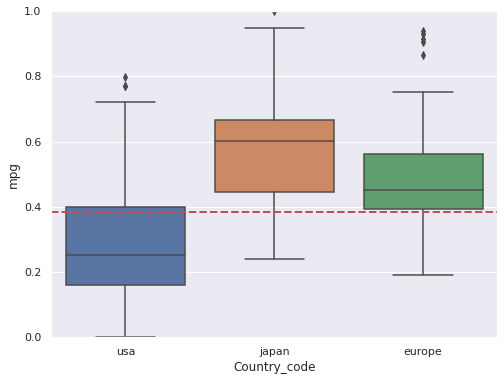

In [13]:
var = 'Country_code'
data_plt = pd.concat([mpg_scale['mpg'], mpg_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(mpg_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2);

Boxplot về mpg của 3 nước, được so sánh với đường mean mpg của cả ba. Có thể thấy xe được sản xuất ở Japan và Europe tiết kiệm nhiên liệu hơn xe được sản xuất ở USA

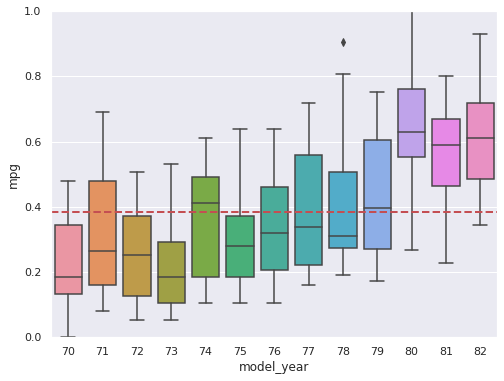

In [14]:
var = 'model_year'
data_plt = pd.concat([mpg_scale['mpg'], mpg_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(mpg_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2);

Theo thời gian, xe được sản xuất với khả năng tiết kiệm nhiên liệu tốt hơn.

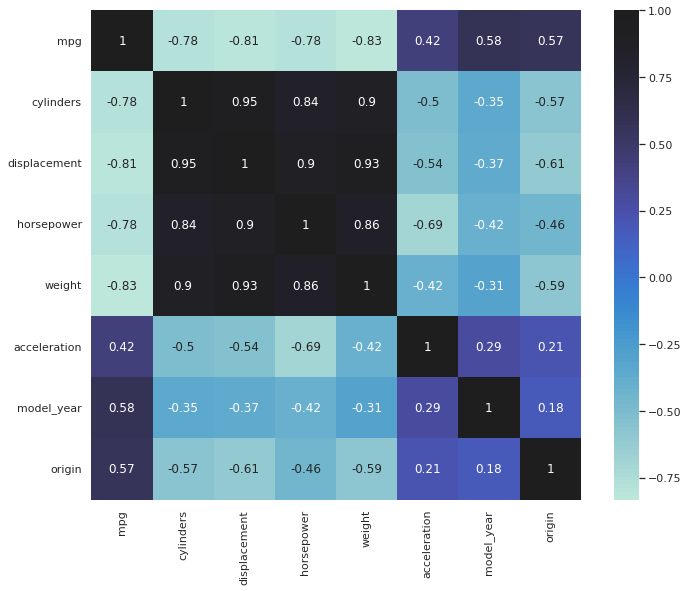

In [15]:
corrmat = mpg.corr()
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(corrmat, square=True, annot=True, center=1);

- Những feature ảnh hưởng lớn nhất đến mpg: origin, model_year, acceleration
- Những feature ít ảnh hưởng nhất đến mpg: weight, displacement

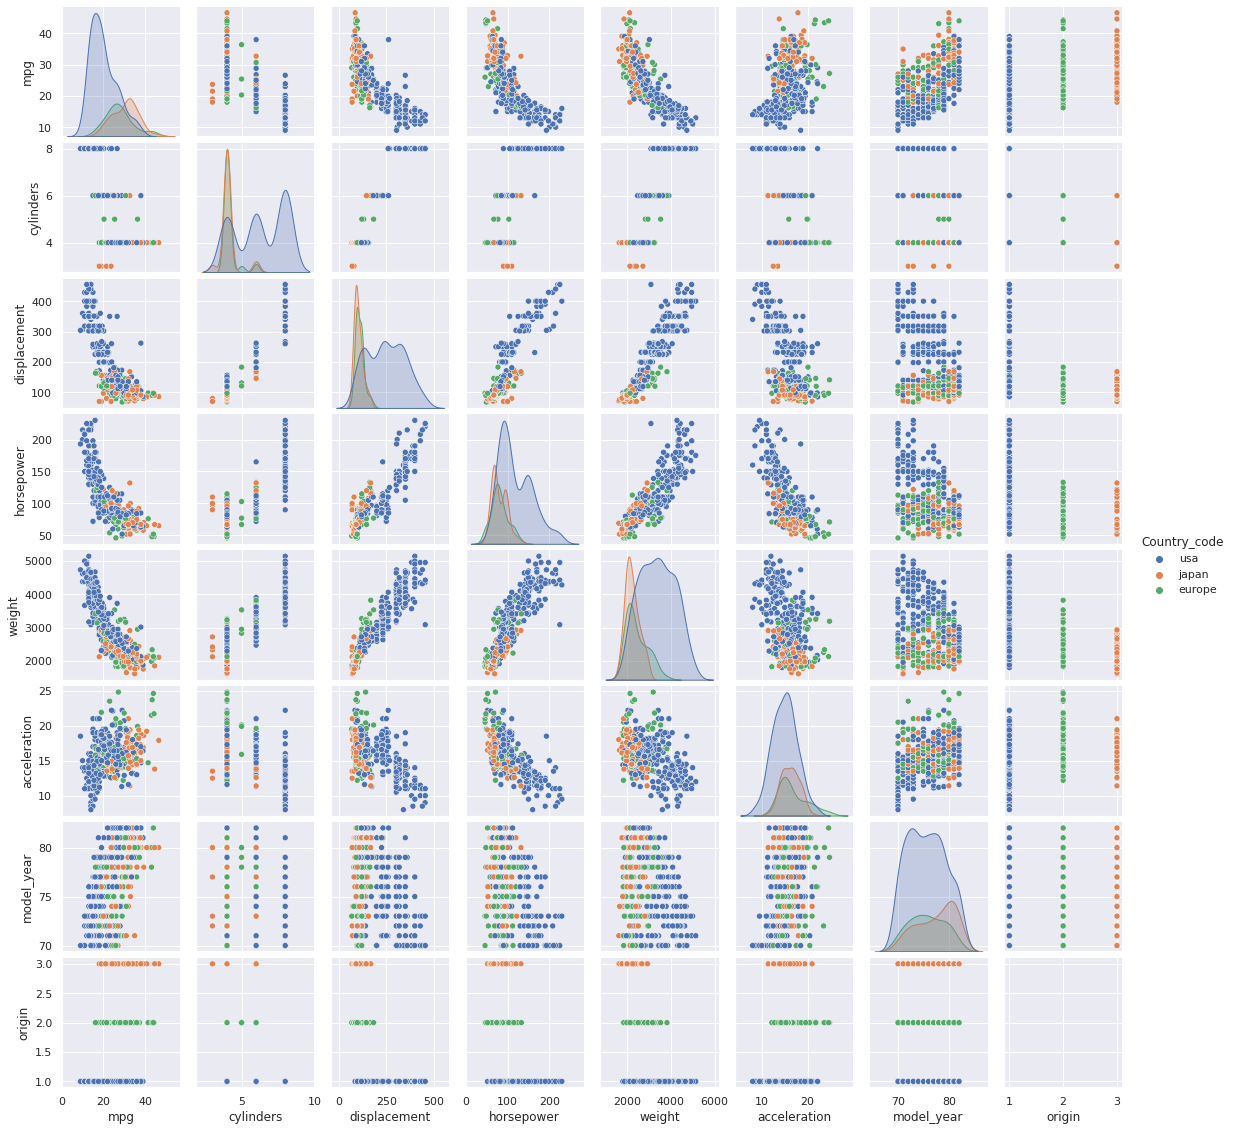

In [16]:
#scatterplot
sns.set()
sns.pairplot(mpg, size = 2.0,hue ='Country_code')
plt.show()

Những cặp feature có sự tuyến tính với nhau: displacement-horsepower; displacement-weight; horsepower-weight

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

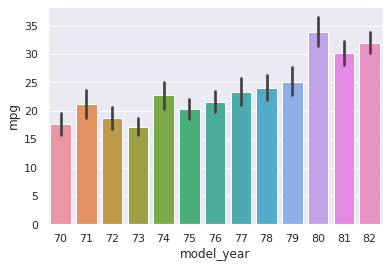

In [17]:
sns.barplot(x='model_year',y='mpg',data=mpg)

In [18]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Country_code
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,usa
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,usa
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,usa
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,usa
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,usa


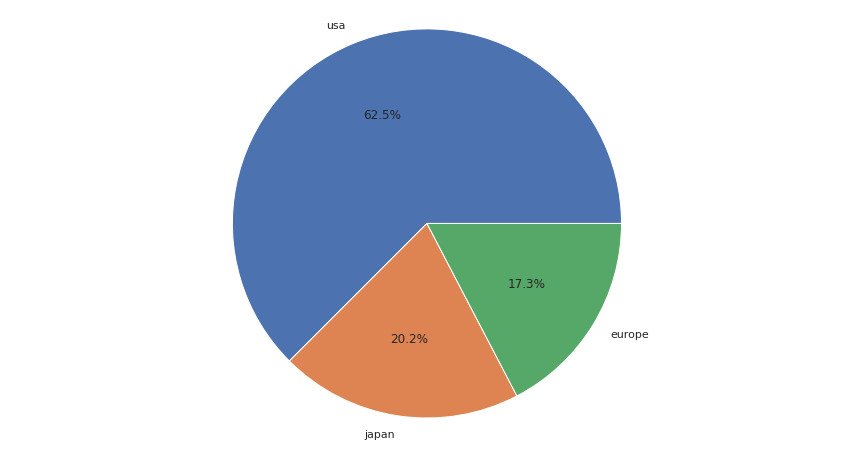

In [19]:
plt.figure(figsize=(15, 8))
plt.pie(mpg.Country_code.value_counts(), labels=mpg.Country_code.unique(), autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Trong bộ dữ liệu, số lượng xe được sản xuất ở USA chiếm tỉ trọng lớn hơn so với 2 khu vực còn lại

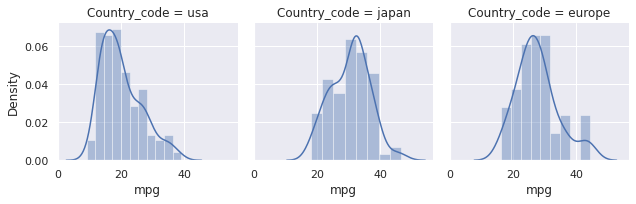

In [20]:
g = sns.FacetGrid(mpg, col="Country_code", hue_kws= {'color': 'b'})
g.map(sns.distplot, "mpg")

Biểu đồ phân tán về mpg của 3 nước

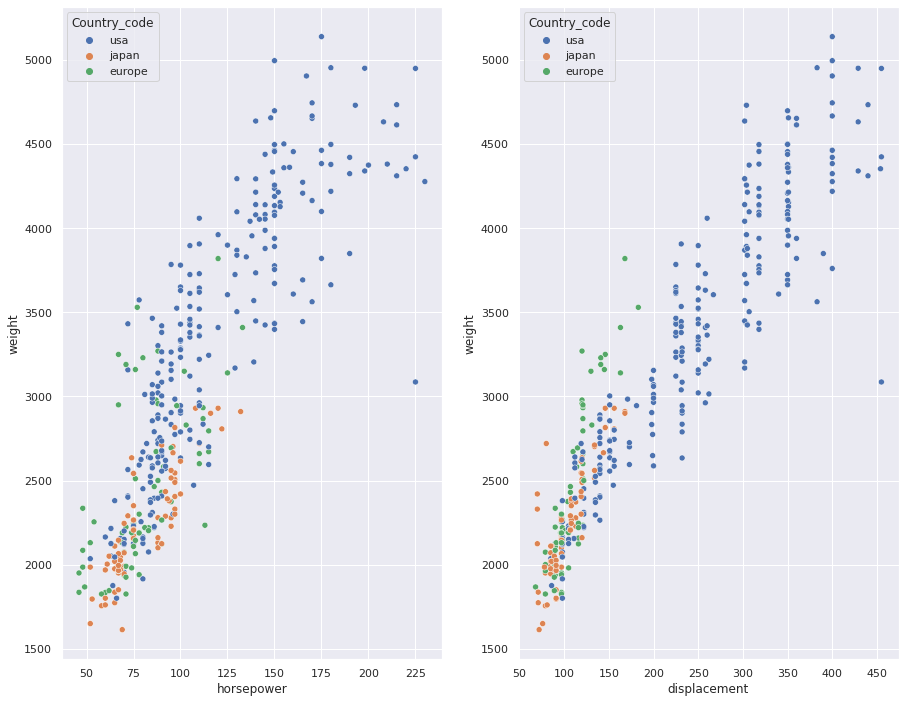

In [21]:
# Setup the subplot2grid Layout
fig = plt.figure(figsize=(15, 12))
ax1 = plt.subplot2grid((1,2), (0,0)) 
ax2 = plt.subplot2grid((1,2), (0,1))

sns.scatterplot(x=mpg.horsepower, y=mpg.weight, hue=mpg.Country_code, ax=ax1)
sns.scatterplot(x=mpg.displacement, y=mpg.weight, hue=mpg.Country_code, ax=ax2);

Vẽ scatterplot để xem rõ hơn sự tuyến tính giữa 2 cặp feature

In [22]:
penguins = sns.load_dataset('penguins')
display(penguins.head())
print("Shape of data:",penguins.shape)
display(penguins.index)
display(penguins.columns)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Shape of data: (344, 7)


RangeIndex(start=0, stop=344, step=1)

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [23]:
display(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [24]:
penguins = penguins.dropna()
display(penguins.isnull().sum())
print("Shape of data:",penguins.shape)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Shape of data: (333, 7)


In [25]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [26]:
print(f"Min bill_length_mm: {penguins.bill_length_mm.min()} and Max bill_length_mm: {penguins.bill_length_mm.max()}")
print(f"Min body_mass_g: {penguins.body_mass_g.min()} and Max body_mass_g: {penguins.body_mass_g.max()}")

print(f'\nNumber of Unique island : {list(penguins.island.unique())}')
print(f'\nNumber of Unique species : {list(penguins.species.unique())}')

print(f"\n<<<Count of sex>>> \n{penguins.sex.value_counts()}")

Min bill_length_mm: 32.1 and Max bill_length_mm: 59.6
Min body_mass_g: 2700.0 and Max body_mass_g: 6300.0

Number of Unique island : ['Torgersen', 'Biscoe', 'Dream']

Number of Unique species : ['Adelie', 'Chinstrap', 'Gentoo']

<<<Count of sex>>> 
Male      168
Female    165
Name: sex, dtype: int64


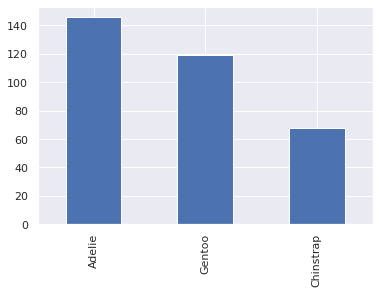

In [27]:
penguins['species'].value_counts().plot(kind='bar');

Số lượng cá thể của mỗi loài trong bộ dữ liệu

<AxesSubplot:>

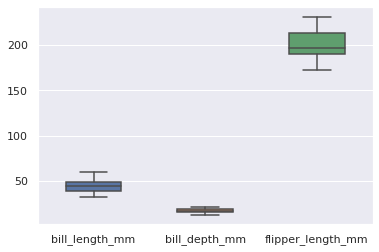

In [28]:
penguins1 = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
sns.boxplot(data=penguins1, width=0.5,fliersize=5)

Biểu đồ boxplot của 3 thông số của chim cánh cụt

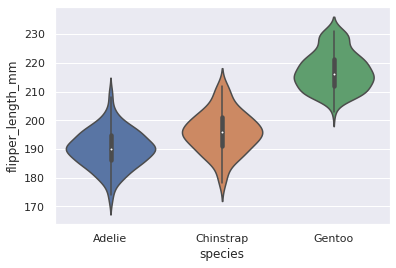

In [29]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=penguins, size=8)

So sánh phân phối của flipper_length_mm của 3 loài 

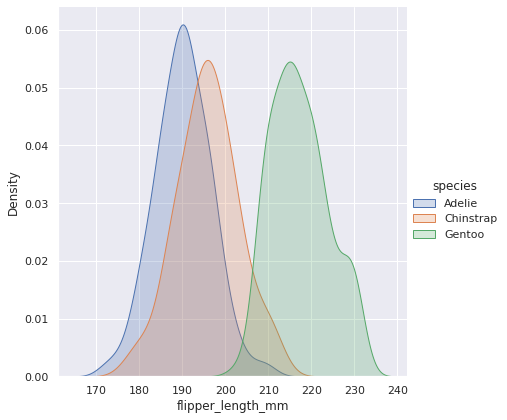

In [30]:
sns.FacetGrid(penguins, hue="species", size=6,) \
   .map(sns.kdeplot, "flipper_length_mm",shade=True) \
   .add_legend()

Tương tự như trên nhưng được vẽ bằng đồ thị kdeplot

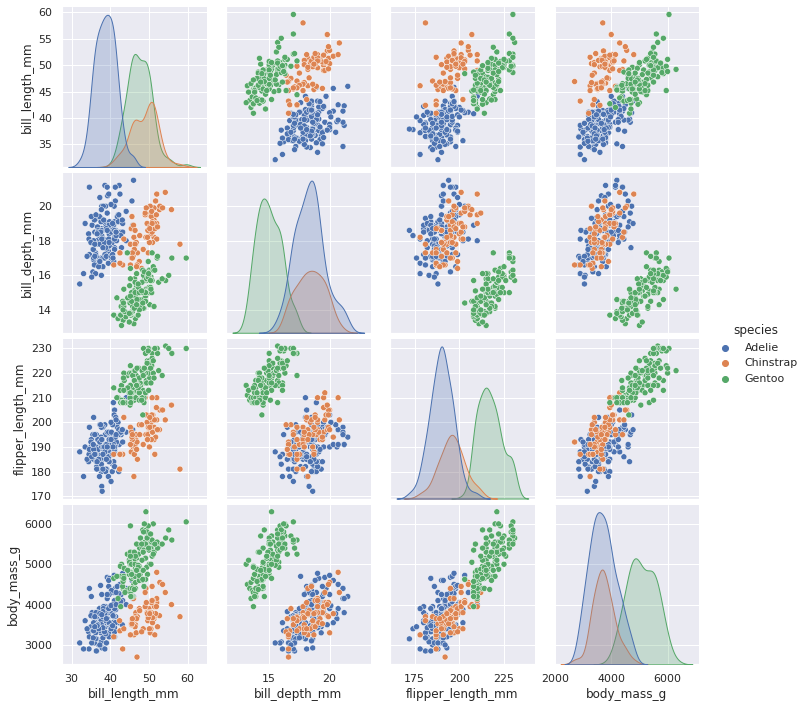

In [31]:
sns.pairplot(penguins, hue='species', height=2.5);
plt.show()

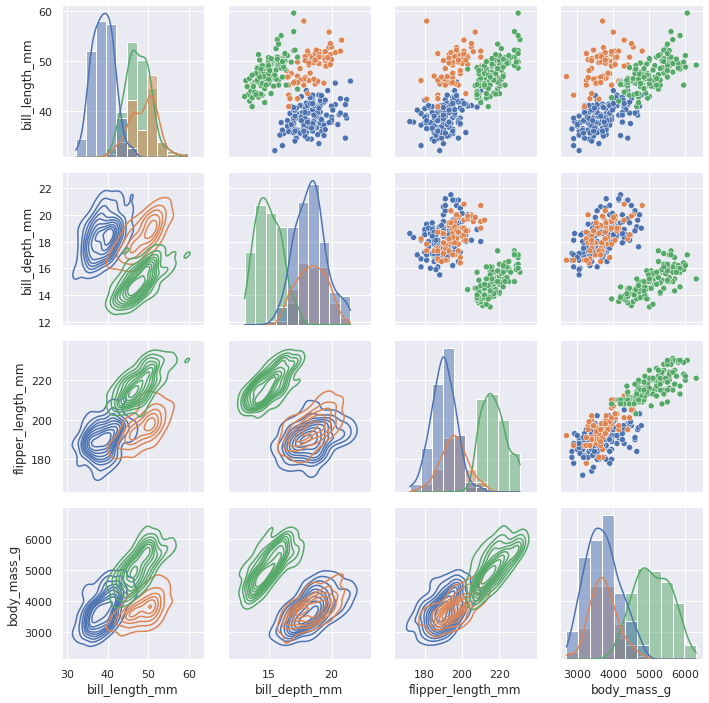

In [32]:
g = sns.PairGrid(penguins, hue='species', diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde = True)

In [33]:
group_by_penguins = penguins.groupby('species').mean()

from sklearn.preprocessing import minmax_scale
group_by_penguins = minmax_scale(group_by_penguins, feature_range=(0.01, 1), axis=0)

group_by_penguins = pd.DataFrame(group_by_penguins)

group_by_penguins[''] = group_by_penguins[group_by_penguins.columns[0]] #duplicating the first column
group_by_penguins.head()

,0,1,2,3,
0,0.010000,0.978798,0.010000,0.010000,0.010000
1,1.000000,1.000000,0.218738,0.029228,1.000000
2,0.874813,0.010000,1.000000,1.000000,0.874813


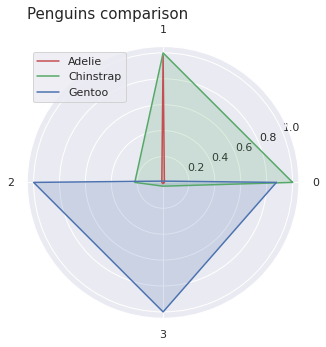

In [34]:
angle = np.linspace(start=0, stop=2 * np.pi, num=len(group_by_penguins.columns))

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)

values = group_by_penguins[:1].values[0]
plt.plot(angle, values, label='Adelie', color='r')
plt.fill(angle, values, 'r', alpha=0.2)

values = group_by_penguins[1:2].values[0]
plt.plot(angle, values, label='Chinstrap', color='g')
plt.fill(angle, values, 'g', alpha=0.2)

values = group_by_penguins[2:3].values[0]
plt.plot(angle, values, label='Gentoo', color='b')
plt.fill(angle, values, 'b', alpha=0.2)

#labels
plt.title('Penguins comparison', size=15, loc='left')
labels = plt.thetagrids(np.degrees(angle), labels=group_by_penguins.columns.values)
plt.legend()

plt.show()